In [1]:
import pandas as pd 
import numpy as np 
# import seaborn as sn
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

from sklearn import preprocessing

In [2]:
maths = pd.read_csv(r"C:\Users\sjr\OneDrive\Desktop\COMP SCIENCE\sjrCodes\py\DJANGO\student_performance\notebook\data\student\student-mat.csv", sep=";", header=0)


In [3]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
print("Summary Statistics: ")
maths.describe()

Summary Statistics: 


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
maths.Medu.value_counts()

Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

### DATA CLEANING

## Mapping numeric values to their respected categorical values

##### PARENTS EDUCATION

In [7]:
# Define a mapping of Medu and Fedu to categorical values
parentsedu_mapping = {
    0: 'None',
    1: 'Primary', 
    2: 'Primary', 
    3: 'Secondary',
    4: 'Higher'
}

# Map grades to numerical values using the mapping dictionary
maths['M_edu'] = maths['Medu'].map(parentsedu_mapping)
maths['F_edu'] = maths['Fedu'].map(parentsedu_mapping)

#### FAMREL 

In [8]:
maths.famrel.value_counts()

famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64

In [9]:
# Define a mapping of Medu and Fedu to categorical values
famrel_mapping = {
    1: 'Bad',
    2: 'Bad', 
    3: 'Fair', 
    4: 'Excellent',
    5: 'Excellent'
}

# Map grades to numerical values using the mapping dictionary
maths['fam_rel'] = maths['famrel'].map(famrel_mapping)

In [10]:
maths.fam_rel.value_counts()

fam_rel
Excellent    301
Fair          68
Bad           26
Name: count, dtype: int64

#### FREETIME

In [11]:
# Define a mapping of Medu and Fedu to categorical values
freetime_mapping = {
    1: 'Very Low',
    2: 'Low', 
    3: 'Moderate', 
    4: 'High',
    5: 'Very High'
}

# Map grades to numerical values using the mapping dictionary
maths['free_time'] = maths['freetime'].map(freetime_mapping)

In [12]:
maths.health.value_counts()

health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64

#### HEALTH

In [13]:
# Define a mapping of Medu and Fedu to categorical values
health_mapping = {
    1: 'Very Bad',
    2: 'Bad', 
    3: 'Fair', 
    4: 'Good',
    5: 'Very Good'
}

# Map grades to numerical values using the mapping dictionary
maths['health_status'] = maths['health'].map(health_mapping)

#### TRAVEL TIME

In [14]:
# Define a mapping of Travel Time to categorical values
traveltime_mapping = {
    1: '<15', 
    2: '15-30', 
    3: '30-60',
    4: 'Above 60'
}

# Map grades to numerical values using the mapping dictionary
maths['travel_time'] = maths['traveltime'].map(traveltime_mapping)

#### STUDY TIME

In [15]:
# Define a mapping of Study Time to categorical values
studytime_mapping = {
    1: '<2hrs', 
    2: '2-5', 
    3: '5-10',
    4: 'Above 10'
}

# Map grades to numerical values using the mapping dictionary
maths['study_time'] = maths['studytime'].map(studytime_mapping)

In [16]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         395 non-null    object
 1   sex            395 non-null    object
 2   age            395 non-null    int64 
 3   address        395 non-null    object
 4   famsize        395 non-null    object
 5   Pstatus        395 non-null    object
 6   Medu           395 non-null    int64 
 7   Fedu           395 non-null    int64 
 8   Mjob           395 non-null    object
 9   Fjob           395 non-null    object
 10  reason         395 non-null    object
 11  guardian       395 non-null    object
 12  traveltime     395 non-null    int64 
 13  studytime      395 non-null    int64 
 14  failures       395 non-null    int64 
 15  schoolsup      395 non-null    object
 16  famsup         395 non-null    object
 17  paid           395 non-null    object
 18  activities     395 non-null   

In [17]:
num_cols = maths.select_dtypes(include=['int64','float64','int32']).columns
num_correlation = maths[num_cols].corr()

In [18]:
num_correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [19]:
# here we drop these columns because we have created new columns mapping them
maths.drop(columns=['Medu','Fedu','traveltime','studytime','guardian'], axis='columns', inplace=True)

In [20]:
maths.drop('reason', axis='columns', inplace=True)

In [21]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         395 non-null    object
 1   sex            395 non-null    object
 2   age            395 non-null    int64 
 3   address        395 non-null    object
 4   famsize        395 non-null    object
 5   Pstatus        395 non-null    object
 6   Mjob           395 non-null    object
 7   Fjob           395 non-null    object
 8   failures       395 non-null    int64 
 9   schoolsup      395 non-null    object
 10  famsup         395 non-null    object
 11  paid           395 non-null    object
 12  activities     395 non-null    object
 13  nursery        395 non-null    object
 14  higher         395 non-null    object
 15  internet       395 non-null    object
 16  romantic       395 non-null    object
 17  famrel         395 non-null    int64 
 18  freetime       395 non-null   

#### DROPPING COLUMNS

- we will be dropping columns which we think doesnt have a bigimpact on our model
- we will check if the model accuracy was not -(ve)ly affected by the dropped column
- if therre is no negative impact we will move on.

In [22]:
maths.drop(columns=['famsize', 'nursery', 'activities'], axis='columns', inplace=True)

In [23]:
maths.drop('higher', axis='columns', inplace=True)

In [24]:
maths.drop('school', axis='columns',inplace= True)

In [25]:
maths.drop(['Pstatus', 'address', 'goout'], axis='columns',inplace= True)

In [26]:
maths.drop(['Dalc', 'Walc'], axis='columns', inplace=True)

In [27]:
maths.drop('age', axis='columns', inplace=True)

In [28]:
maths.drop(['Mjob', 'Fjob'], axis='columns', inplace=True)

In [29]:
# maths.info()

In [30]:
# maths.drop(['guardian'], axis='columns', inplace=True)

In [31]:
# maths.drop(['reason'], axis='columns', inplace=True)

In [32]:
maths.drop('health', axis='columns',inplace= True)

In [33]:
maths.drop(['freetime', 'famrel'], axis='columns',inplace= True)

In [34]:
maths.drop('famsup', axis='columns',inplace= True)

In [35]:
maths.drop('schoolsup', axis='columns',inplace= True)

In [36]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            395 non-null    object
 1   failures       395 non-null    int64 
 2   paid           395 non-null    object
 3   internet       395 non-null    object
 4   romantic       395 non-null    object
 5   absences       395 non-null    int64 
 6   G1             395 non-null    int64 
 7   G2             395 non-null    int64 
 8   G3             395 non-null    int64 
 9   M_edu          395 non-null    object
 10  F_edu          395 non-null    object
 11  fam_rel        395 non-null    object
 12  free_time      395 non-null    object
 13  health_status  395 non-null    object
 14  travel_time    395 non-null    object
 15  study_time     395 non-null    object
dtypes: int64(5), object(11)
memory usage: 49.5+ KB


##### RENAMING THE PAID COLUMN

In [79]:
maths.rename(columns={'paid': 'extra_lessons'}, inplace=True)

In [80]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            395 non-null    object
 1   failures       395 non-null    int64 
 2   extra_lessons  395 non-null    object
 3   internet       395 non-null    object
 4   romantic       395 non-null    object
 5   absences       395 non-null    int64 
 6   G1             395 non-null    int64 
 7   G2             395 non-null    int64 
 8   M_edu          395 non-null    object
 9   F_edu          395 non-null    object
 10  fam_rel        395 non-null    object
 11  free_time      395 non-null    object
 12  health_status  395 non-null    object
 13  travel_time    395 non-null    object
 14  study_time     395 non-null    object
 15  G3             395 non-null    int64 
dtypes: int64(5), object(11)
memory usage: 49.5+ KB


In [81]:
maths.fam_rel.unique()

array(['Excellent', 'Fair', 'Bad'], dtype=object)

In [82]:
cat_colums = maths.select_dtypes(include=['object']).columns

In [83]:
cat_colums

Index(['sex', 'extra_lessons', 'internet', 'romantic', 'M_edu', 'F_edu',
       'fam_rel', 'free_time', 'health_status', 'travel_time', 'study_time'],
      dtype='object')

### DATA VISUALIZATIONS 

Text(0, 0.5, 'Frequency')

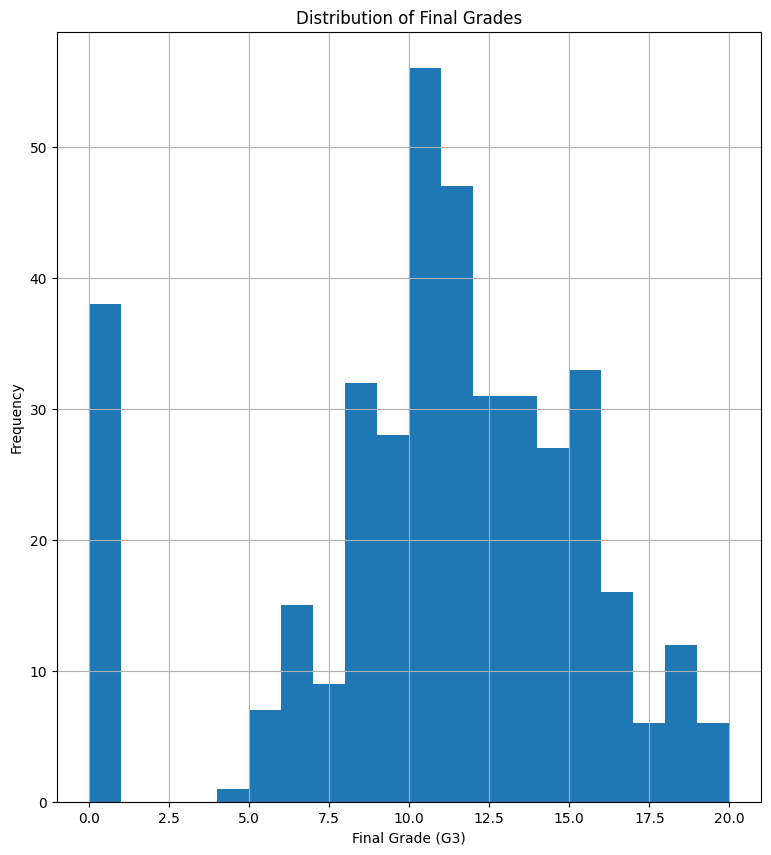

In [84]:
plt.subplot(1,2,1)
maths['G3'].hist(bins=20)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')

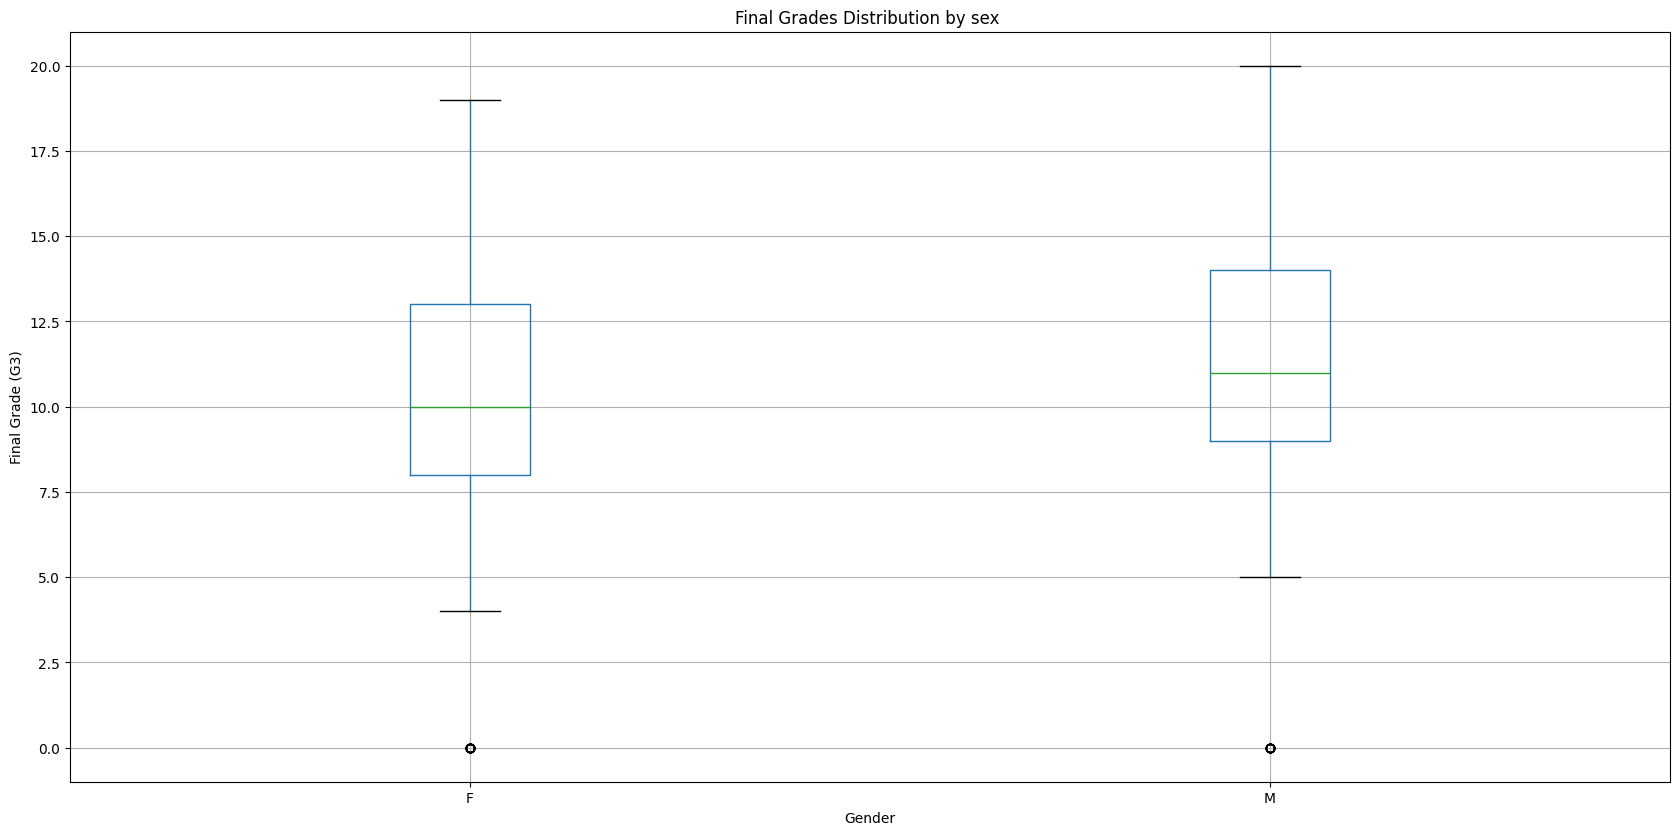

In [85]:
maths.boxplot(column='G3', by='sex')
plt.title('Final Grades Distribution by sex ')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.suptitle('')
plt.show()

#### From this boxplot we can have different data insights which includes: 
- no female managed to score 20 at final grade
- all the students which scored 20 are male students
- male students have got better final grades compared to female
- the lowest grades are for female

A LOT OF INSIGHTS CAN BE DRAWN FROMTHIS BOXPLOT

#### appending G3 to the last column

In [86]:
if 'G3' in maths.columns:

    # create a list of column names excluding 'G3'
    cols = [col for col in maths.columns if col != 'G3']
    # append G3 at the end of the list
    cols.append('G3')
    # reorder the Dataframe columns
    maths = maths[cols]

In [87]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            395 non-null    object
 1   failures       395 non-null    int64 
 2   extra_lessons  395 non-null    object
 3   internet       395 non-null    object
 4   romantic       395 non-null    object
 5   absences       395 non-null    int64 
 6   G1             395 non-null    int64 
 7   G2             395 non-null    int64 
 8   M_edu          395 non-null    object
 9   F_edu          395 non-null    object
 10  fam_rel        395 non-null    object
 11  free_time      395 non-null    object
 12  health_status  395 non-null    object
 13  travel_time    395 non-null    object
 14  study_time     395 non-null    object
 15  G3             395 non-null    int64 
dtypes: int64(5), object(11)
memory usage: 49.5+ KB


In [88]:
# maths.rename(columns={'paid': 'extra_lessons'}, inplace=True)

#### OUTLIER HANDLING

#### Detecting outliers using a scatter plot

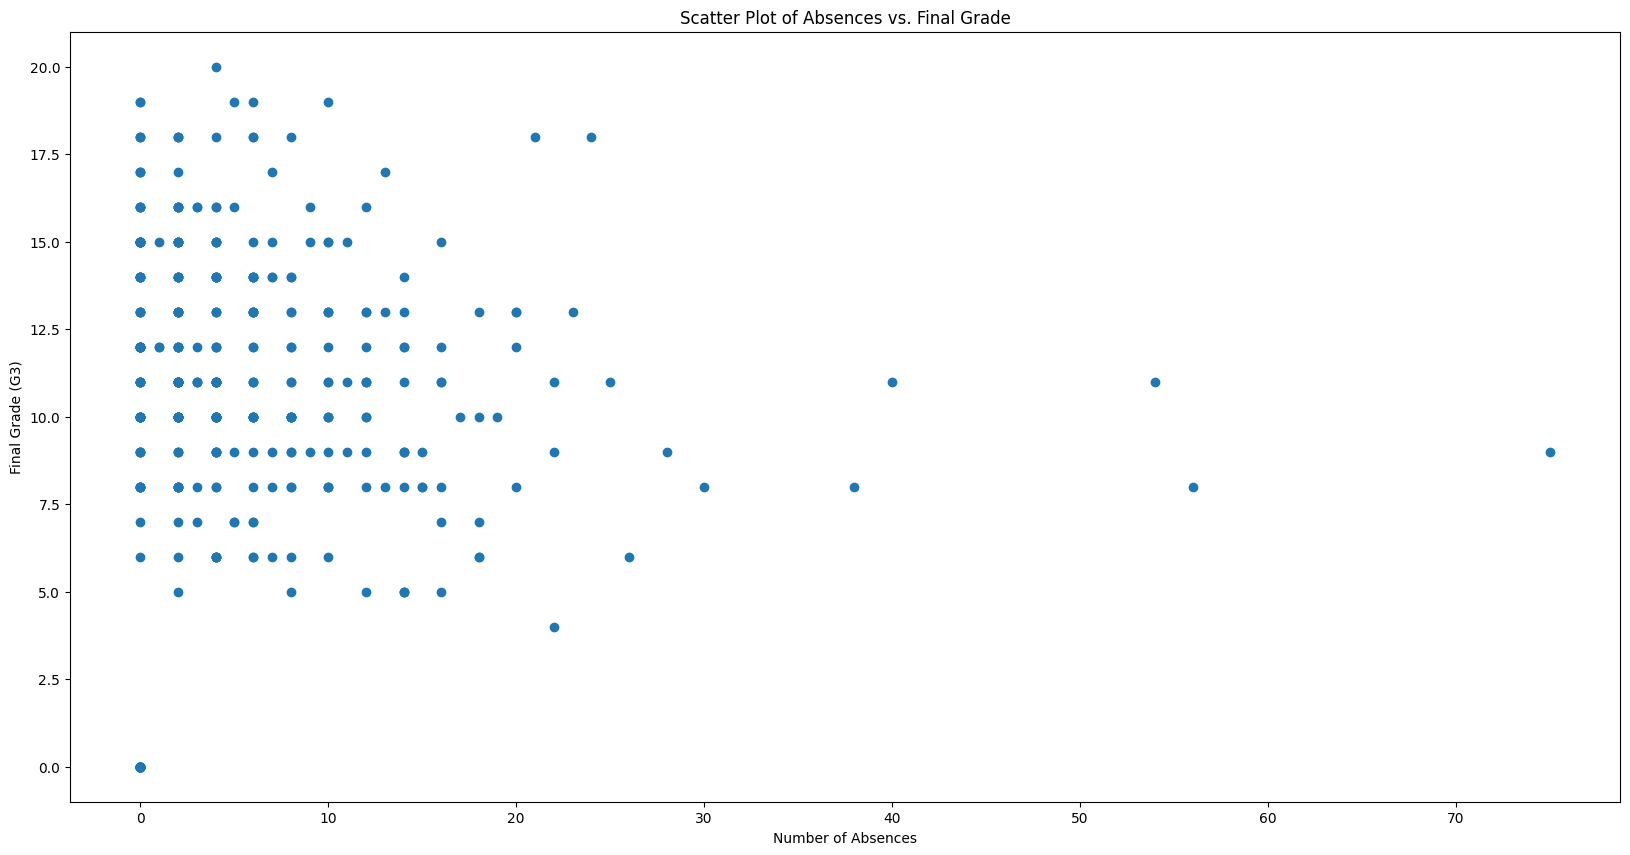

In [89]:
plt.scatter(maths['absences'], maths['G3'])
plt.title('Scatter Plot of Absences vs. Final Grade')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.show()

From the above scatter:
- we can see that a lot of values are between 0 and 30 then there are a few values after 30. there are the OUTLIERS that we need to remove
- so we will manually set our lower and upper bounds to 0 and 30 respectively
- anything above 30 will be removed to gether with the column they are related to

In [90]:
##Calculate Interqaurtile range
# Q1 = maths['absences'].quantile(0.25)
# Q3 = maths['absences'].quantile(0.75)
# Q1 = 0
# Q3 = 30

# IQR = Q3 - Q1

In [91]:
#manually setting lower and upper bounds
lower_bound = 0
upper_bound = 30

### remove outliers

In [92]:
filtered_data = maths[(maths['absences'] >= lower_bound) & (maths['absences'] <= upper_bound)]

In [93]:
filtered_data.absences.value_counts()

absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
30      1
23      1
19      1
24      1
21      1
28      1
26      1
25      1
17      1
Name: count, dtype: int64

In [94]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            390 non-null    object
 1   failures       390 non-null    int64 
 2   extra_lessons  390 non-null    object
 3   internet       390 non-null    object
 4   romantic       390 non-null    object
 5   absences       390 non-null    int64 
 6   G1             390 non-null    int64 
 7   G2             390 non-null    int64 
 8   M_edu          390 non-null    object
 9   F_edu          390 non-null    object
 10  fam_rel        390 non-null    object
 11  free_time      390 non-null    object
 12  health_status  390 non-null    object
 13  travel_time    390 non-null    object
 14  study_time     390 non-null    object
 15  G3             390 non-null    int64 
dtypes: int64(5), object(11)
memory usage: 51.8+ KB


### DATA ENCODING
- here we will used filtered data as our new variable

In [95]:
encoded = pd.get_dummies(filtered_data, columns=cat_colums, drop_first=True, dtype=int)

In [96]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   failures                 390 non-null    int64
 1   absences                 390 non-null    int64
 2   G1                       390 non-null    int64
 3   G2                       390 non-null    int64
 4   G3                       390 non-null    int64
 5   sex_M                    390 non-null    int32
 6   extra_lessons_yes        390 non-null    int32
 7   internet_yes             390 non-null    int32
 8   romantic_yes             390 non-null    int32
 9   M_edu_None               390 non-null    int32
 10  M_edu_Primary            390 non-null    int32
 11  M_edu_Secondary          390 non-null    int32
 12  F_edu_None               390 non-null    int32
 13  F_edu_Primary            390 non-null    int32
 14  F_edu_Secondary          390 non-null    int32
 15  fam_rel_Exc

#### CORRELATION FOR THE ENCODED DATA

In [97]:
encoded.corr()

,failures,absences,G1,G2,G3,sex_M,extra_lessons_yes,internet_yes,romantic_yes,M_edu_None,...,health_status_Fair,health_status_Good,health_status_Very Bad,health_status_Very Good,travel_time_30-60,travel_time_<15,travel_time_Above 60,study_time_5-10,study_time_<2hrs,study_time_Above 10
failures,1.000000,0.095153,-0.356805,-0.357020,-0.361642,0.041325,-0.190996,-0.064223,0.090357,0.078750,...,0.048990,-0.006154,-0.078213,0.035642,0.048676,-0.062561,0.080898,-0.068114,0.150398,-0.108415
absences,0.095153,1.000000,-0.019258,-0.021735,0.071524,-0.022958,0.034231,0.094114,0.111841,-0.067176,...,0.034825,-0.043735,0.008257,-0.036975,-0.006502,0.010765,-0.015108,-0.085508,0.035662,-0.044959
G1,-0.356805,-0.019258,1.000000,0.852483,0.801391,0.094458,0.041244,0.073087,-0.033617,0.028614,...,-0.055960,-0.019976,0.092578,-0.024231,-0.013445,0.074078,-0.088796,0.148154,-0.082663,0.079532
G2,-0.357020,-0.021735,0.852483,1.000000,0.904797,0.091752,0.104309,0.120800,-0.107783,0.045305,...,-0.066184,-0.038252,0.134146,-0.026899,-0.076740,0.122985,-0.104330,0.092970,-0.069386,0.094874
G3,-0.361642,0.071524,0.801391,0.904797,1.000000,0.104165,0.102166,0.099973,-0.126771,0.049216,...,-0.050977,-0.028164,0.121471,-0.004228,-0.063517,0.107864,-0.052786,0.094189,-0.047302,0.049263
sex_M,0.041325,-0.022958,0.094458,0.091752,0.104165,1.000000,-0.137731,0.047604,-0.098901,-0.025312,...,-0.047801,-0.041325,-0.094517,0.152363,0.000671,-0.033808,0.079121,-0.229026,0.318086,-0.058182
extra_lessons_yes,-0.190996,0.034231,0.041244,0.104309,0.102166,-0.137731,1.000000,0.154966,0.013712,-0.022199,...,-0.003758,0.002301,0.125823,-0.054295,-0.099523,0.015338,-0.060688,0.064264,-0.194706,0.073129
internet_yes,-0.064223,0.094114,0.073087,0.120800,0.099973,0.047604,0.154966,1.000000,0.082452,-0.038534,...,-0.061177,0.018349,0.080239,-0.051448,-0.061183,0.114574,-0.031173,0.089194,-0.021650,0.015335
romantic_yes,0.090357,0.111841,-0.033617,-0.107783,-0.126771,-0.098901,0.013712,0.082452,1.000000,-0.061540,...,0.057824,-0.048842,-0.035509,0.030986,-0.012719,0.018745,0.091470,0.103131,-0.112782,-0.083068
M_edu_None,0.078750,-0.067176,0.028614,0.045305,0.049216,-0.025312,-0.022199,-0.038534,-0.061540,1.000000,...,-0.048224,-0.039375,-0.032196,0.054264,-0.022041,0.002842,-0.012741,0.040230,0.013273,-0.024012


### MODEL TRAINING

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

##### SPLIT THE DATA INTO FEATURES(X) AND TARGET VARIABLE (Y)

In [99]:
X = encoded.drop ('G3', axis=1)
Y = encoded['G3']

##### TRAIN TEST SPLIT

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### STANDARDIZE THE FEATURES

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### FINDING OUT THE BEST MODEL

In [102]:
models = {
    "Linear Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

param_grids = {
    "Linear Regression": {},
    "Decision Tree": {'max_depth':[None,5,10,15]},
    "Random Forest": {'n_estimators':[50,100,200]},
    "Gradient Boost": {'n_estimators':[50,100,200], 'learning_rate': [0.01, 0,1, 0.5]},
    "Support Vector Machine": {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train_scaled, Y_train)

print("Best parameters for", model_name, ":", grid_search.best_params_)
print("Best mean squared error:", -grid_search.best_score_)

In [103]:
svm_model = SVR()

In [104]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

In [105]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [106]:
best_svm_model = SVR(**grid_search.best_params_)
best_svm_model.fit(X_train_scaled, Y_train)

SVR(C=1, kernel='linear')

In [107]:
y_pred = best_svm_model.predict(X_test_scaled)

In [108]:
mse = mean_squared_error(Y_test, y_pred)
print("The Mean Squared Error is:", mse)

The Mean Squared Error is: 3.7113855869186465


In [109]:
svm_model=svm_model.fit(X_train,Y_train)
svm_model.score(X_test,Y_test)

0.8237708787450417

#### Lets try to use the feature selection tools

In [110]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVR

In [111]:
svc = SVR()

In [112]:
# Feature selection using chi-squared test
selector = SelectKBest(chi2, k=20) # Select top k features

In [113]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

In [114]:
# Train a logistic regression model on the selected features
# lr = LogisticRegression()
svmodel=svc.fit(X_train_selected, Y_train)
accuracy = svc.score(X_test_selected, Y_test) # Evaluate the model on the validation set

In [115]:
accuracy

0.8256225592260952

### NOW LETS SAVE OUR MODEL

In [117]:
# import joblib, pickle
# # Save the model to a file
# filename = 'svm_modell.pkl'
# joblib.dump(svm_model, filename)

['svm_modell.pkl']

### ORDINAL ENCODING

In [73]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [1]:
# # Separate the features and the target variable
# x = filtered_data.drop('G3', axis=1)
# y = filtered_data['G3']

# # Perform ordinal encoding on the categorical features
# encoder = OrdinalEncoder()
# x_encoded = encoder.fit_transform(X)

# # Perform label encoding on the categorical features
# # encoder = LabelEncoder()
# # X_encoded = X.apply(encoder.fit_transform)


# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# # Train an SVM model using the encoded data
# model = SVC()
# sv_model=model.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = sv_model.predict(x_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.358974358974359

In [76]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 390, dtype: int64

#### SAVING THE MODEL

In [77]:
# import joblib
# # Save the model to a file
# filename = 'svm_model.sav'
# joblib.dump(sv_model, filename)